In [1]:
!pip install mlflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.8 MB/s eta 0:00:00
  Created wheel for databricks-cli: filename=databricks_cli-0.17.7-py3-none-any.whl size=143860 sha256=3e8d8762abfee1facc321aff233186cc4c1ec93808094a1175d5f343a4bc6d88
  Stored in directory: /root/.cache/pip/wheels/a

Epoch 1/20
3999/3999 [==============================] - 40s 9ms/step - loss: 0.0013
Epoch 2/20
3999/3999 [==============================] - 37s 9ms/step - loss: 4.6452e-04
Epoch 3/20
3999/3999 [==============================] - 36s 9ms/step - loss: 3.1045e-04
Epoch 4/20
3999/3999 [==============================] - 36s 9ms/step - loss: 2.7612e-04
Epoch 5/20
3999/3999 [==============================] - 34s 9ms/step - loss: 2.9096e-04
Epoch 6/20
3999/3999 [==============================] - 36s 9ms/step - loss: 2.4567e-04
Epoch 7/20
3999/3999 [==============================] - 35s 9ms/step - loss: 2.4490e-04
Epoch 8/20
3999/3999 [==============================] - 35s 9ms/step - loss: 2.4124e-04
Epoch 9/20
3999/3999 [==============================] - 37s 9ms/step - loss: 2.2968e-04
Epoch 10/20
3999/3999 [==============================] - 35s 9ms/step - loss: 2.2795e-04
Epoch 11/20
3999/3999 [==============================] - 36s 9ms/step - loss: 2.2380e-04
Epoch 12/20
3999/3999 [===========

2023/06/11 15:40:57 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2023/06/11 15:41:20 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.4.10+cuda11.cudnn86) contains a local version label (+cuda11.cudnn86). MLflow logged a pip requirement for this package as 'jaxlib==0.4.10' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


32/32 [==============================] - 1s 5ms/step


<ipython-input-8-725ef91653bc>:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


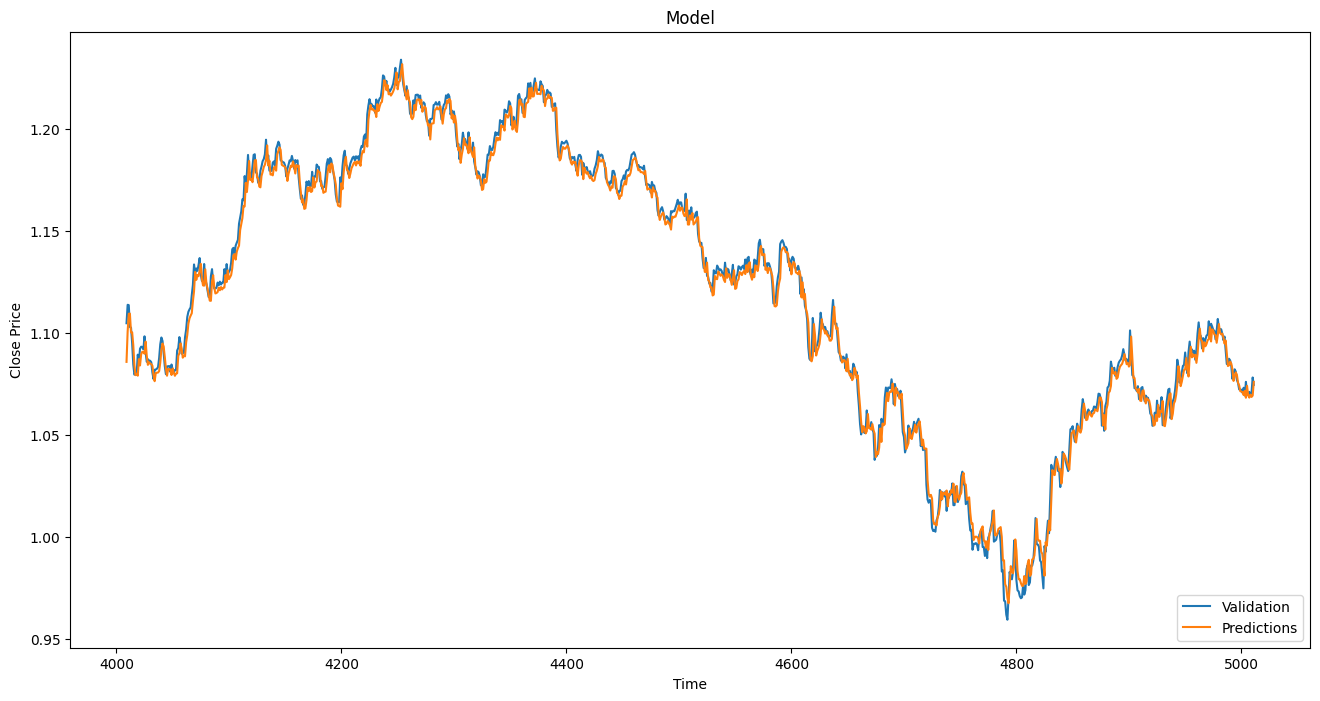

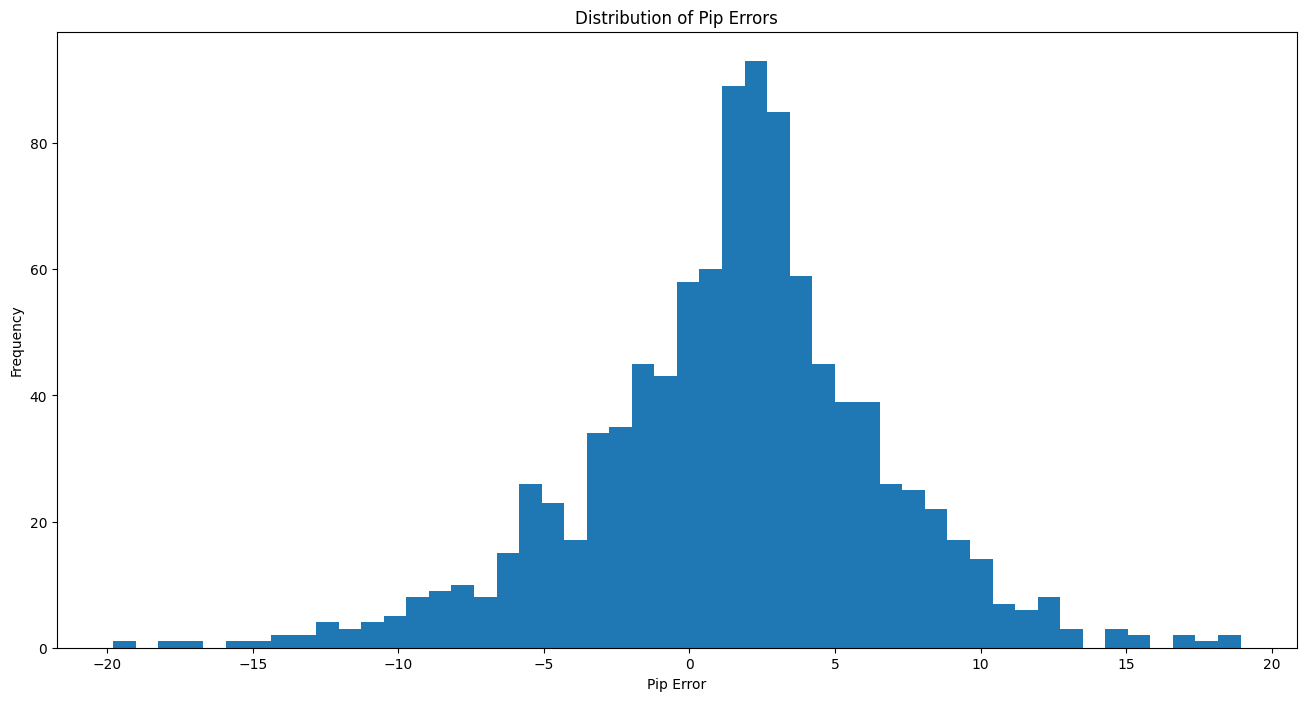

      Actual  Predicted  Pip Error
0     1.1047     1.0858   189.2933
1     1.1138     1.1007   131.1942
2     1.1136     1.1094    42.2379
3     1.1029     1.1095   -65.9922
4     1.1026     1.1002    23.6813
...      ...        ...        ...
998   1.0711     1.0683    28.0233
999   1.0698     1.0698     0.7086
1000  1.0707     1.0687    20.2318
1001  1.0782     1.0693    88.9866
1002  1.0746     1.0760   -14.5440

[1003 rows x 3 columns]
Highest Pip Error: 189.2933
Lowest Pip Error: -197.9251
RMSE: 0.005321711956275282


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import mlflow
import mlflow.keras

# Load the CSV file into a pandas dataframe
df = pd.read_csv('eurusd.csv')

# Select the columns we will use for the model
data = df.filter(['close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Scale the data to be between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Define the number of days to use in the LSTM model
n_days = 10
# Split the data into training and testing sets
train_data = scaled_data[:int(len(dataset) * 0.8)]
test_data = scaled_data[int(len(dataset) * 0.8) - n_days:]

# Create the training data
x_train = []
y_train = []

for i in range(n_days, len(train_data)):
    x_train.append(train_data[i - n_days:i, 0])
    y_train.append(train_data[i, 0])

# Convert the training data to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the training data for LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Start an MLflow run
mlflow.start_run(nested=True)

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=20)

# Log the model parameters and metrics to MLflow
mlflow.log_params({
    'n_days': n_days,
    'optimizer': 'adam',
    'loss': 'mean_squared_error'
})


# Save the trained model using MLflow
mlflow.keras.log_model(model, 'my_model')

# Create the testing data
x_test = []

for i in range(n_days, len(test_data)):
    x_test.append(test_data[i - n_days:i, 0])

# Convert the testing data to numpy array
x_test = np.array(x_test)

# Reshape the testing data for LSTM
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)

# Unscale the predicted values
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE) of the model
rmse = np.sqrt(np.mean(predictions - test_data[n_days:, 0])**2)

# Plot the data and predictions
train = data[:int(len(dataset) * 0.8)]
valid = data[int(len(dataset) * 0.8):]
valid['Predictions'] = predictions


plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Validation', 'Predictions'], loc='lower right')
plt.show()

# Calculate the pip error between actual and predicted closing prices
pip_error = (valid['close'].values - predictions.flatten()) / 0.001

# Plot a histogram of pip errors
plt.figure(figsize=(16, 8))
plt.title('Distribution of Pip Errors')
plt.xlabel('Pip Error')
plt.ylabel('Frequency')
plt.hist(pip_error, bins=50)
plt.show()

# Calculate the pip error between actual and predicted closing prices
pip_error = (valid['close'].values - predictions.flatten()) / 0.0001

# Create a DataFrame with actual, predicted, and pip error values
results_df = pd.DataFrame({'Actual': valid['close'].values, 'Predicted': predictions.flatten(), 'Pip Error': pip_error})
results_df = results_df.round(4)

# Print the DataFrame
print(results_df)

# Print the highest and lowest pip error values
max_pip_error = results_df['Pip Error'].max()
min_pip_error = results_df['Pip Error'].min()
print('Highest Pip Error:', max_pip_error)
print('Lowest Pip Error:', min_pip_error)

results_df.to_csv('./my_predicts_better.csv', index=False)

df = pd.read_csv('my_predicts_better.csv')
rmse = mean_squared_error(df['Actual'], df['Predicted'])
rmse = np.sqrt(rmse)

print("RMSE:", rmse)

# Save the trained model using Keras save method
model.save('my_model_5days.h5')

# End the MLflow run
mlflow.end_run()
